# Dimensionality Reduction in Python

#### Métodos Intensivos de Computación Estadística

#### Juan Sebastián Corredor Rodriguez - jucorredorr@unal.edu.

See https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e.

The main idea of this notebook is to present some dimensionality reduction methods in Python and evaluate its results and performance. Specifically, the methods are:
1. [PCA (Principal Component Analysis)](https://en.wikipedia.org/wiki/Principal_component_analysis).
2. [LLE (Locally Linear Embedding)](http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf).
3. [Isomap (Isometric Feature Mapping)](https://en.wikipedia.org/wiki/Isomap). 

In [9]:
#Import the required libraries and functions
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn import manifold, datasets
from scipy.misc import imread
import scipy as sc
import time
import matplotlib
import matplotlib.pyplot as plt
# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D

#### Principal  Component Analysis (PCA) 
We use an example of __PCA__ using images extracted from https://medium.com/@sebastiannorena/pca-principal-components-analysis-applied-to-images-of-faces-d2fc2c083371.

In [10]:
import warnings
warnings.filterwarnings('ignore')

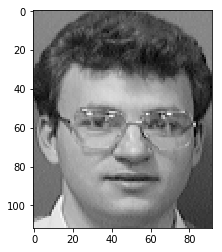

In [12]:
#An example of the images used 
#img = imread("/Users/JuanSebastianCorredorRodriguez/Documents/Git Repositories/Datasets/Att-Faces/s5/1.pgm")
img = imread('/Users/danielmartinez/Documents/Att-Faces/s6/1.pgm')
img = img.astype(np.uint8)
img = img/255
plt.imshow(img, cmap = 'gray')

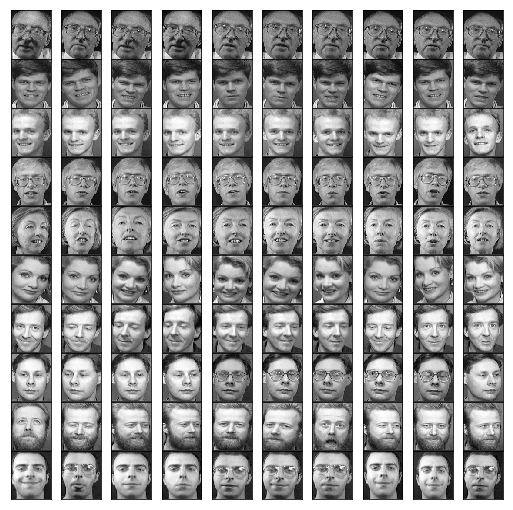

In [13]:
#Load the images and show some of then

from glob import iglob
faces = pd.DataFrame([])
#for path in iglob('/Users/JuanSebastianCorredorRodriguez/Documents/Git Repositories/Datasets/Att-Faces/*/*.pgm'):
for path in iglob('/Users/danielmartinez/Documents/Att-Faces/*/*.pgm'):
 img=imread(path)
 face = pd.Series(img.flatten(),name=path)
 faces = faces.append(face)
 
fig, axes = plt.subplots(10,10,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces.iloc[i].values.reshape(112,92),cmap="gray")

In [15]:
#Let's see how many faces and howe many pixels we have in our dataset 
faces.shape

(400, 10304)

It is clear that we have a high dimensional data (more than 10000 feautres), so a Dimensionality Reduction Method will be very useful. 

So let's see how to implement PCA.

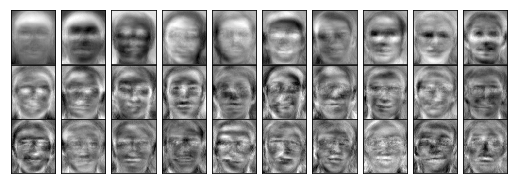

In [19]:
#n_components = p means it will return the Eigenvectors that have the (p*100)% of the variation in the dataset
faces_pca = PCA(n_components = 0.75)
faces_pca.fit(faces)
fig, axes = plt.subplots(3, 10, figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces_pca.components_[i].reshape(112,92), cmap="gray")

In [20]:
#How many components
faces_pca.n_components_

30

In [21]:
%%timeit -n10 -r1
#Let'see the cumulative explained variance of each component
pca = PCA().fit(faces)

633 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


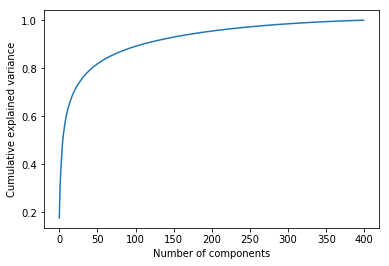

In [22]:
pca = PCA().fit(faces)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

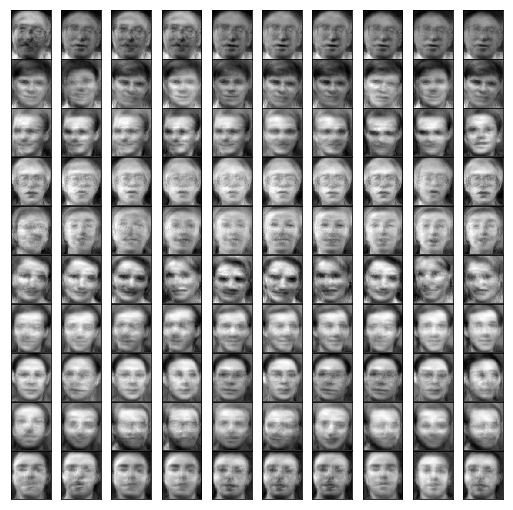

In [23]:
#Let'see how it behaves the inverse transform 
components = faces_pca.transform(faces)
projected = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(112,92),cmap="gray")

In [25]:
projected.shape

(400, 10304)

#### Isometric Feature Mapping (Isomap) and Locally Linear Embedding (LLE)

Let's see the performande of this methods in the Swiss Roll. The main idea of this two methodso is to think in a local way by analyzing k-nearest neighbors in each data point.

See https://plot.ly/scikit-learn/plot-swissroll/.

In [184]:
swiss, color = datasets.samples_generator.make_swiss_roll(n_samples = 1000)

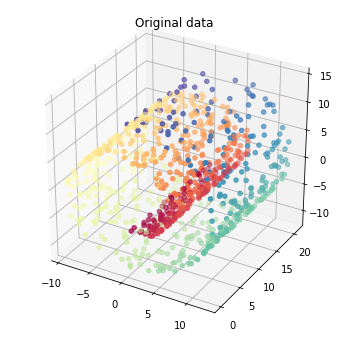

In [185]:
# Plot result
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swiss[:, 0], swiss[:, 1], swiss[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
plt.show()

In [186]:
%%timeit -n10 -r1
#print("Computing LLE embedding")
neighbors = 10
swiss_reduction, err = manifold.locally_linear_embedding(swiss, n_neighbors=neighbors,
                                             n_components=2)
#print("Done. Reconstruction error: %g" % err)

185 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [187]:
print("Computing LLE embedding")
neighbors = 10
swiss_reduction, err = manifold.locally_linear_embedding(swiss, n_neighbors=neighbors,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 1.44101e-07


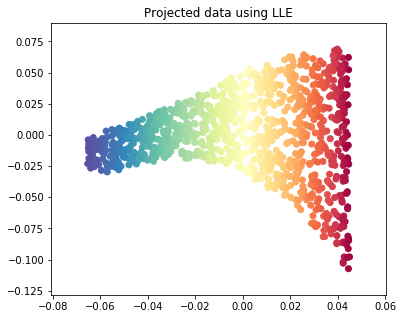

In [188]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.scatter(swiss_reduction[:, 0], swiss_reduction[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.title('Projected data using LLE')
plt.show()

In [189]:
%%timeit -n3 -r1
#print("Computing ISOMAP embedding")
neighbors = 10
swiss_reduction = manifold.Isomap(n_neighbors=neighbors, n_components=2).fit_transform(swiss)
#print("Done. Reconstruction error: %g" % err)

470 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


In [190]:
print("Computing ISOMAP embedding")
neighbors = 10
isomapping = manifold.Isomap(n_neighbors=neighbors, n_components=2)
swiss_reduction = isomapping.fit_transform(swiss)
print("Done. Reconstruction error: %g" % isomapping.reconstruction_error())

Computing ISOMAP embedding
Done. Reconstruction error: 8.84164


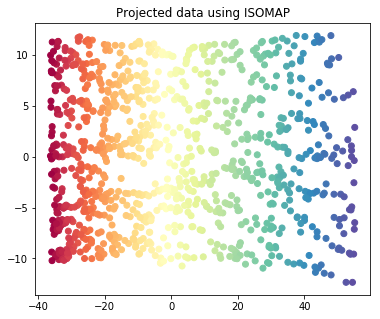

In [191]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.scatter(swiss_reduction[:, 0], swiss_reduction[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.title('Projected data using ISOMAP')
plt.show()

And now let's see what happens with PCA

In [205]:
pca_swiss = PCA(n_components=3)
swiss_reduction = pca_swiss.fit_transform(swiss)

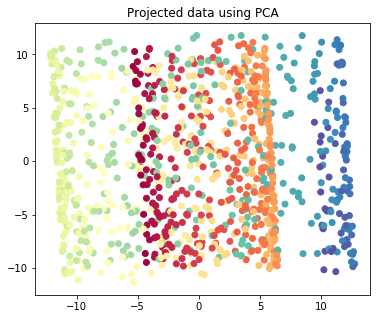

In [209]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.scatter(swiss_reduction[:, 0], swiss_reduction[:, 2], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.title('Projected data using PCA')
plt.show()

It looks like a one dimensional manifold (and that's an error). 